### Exploring Quarterback Statistics and Application to fantasy football

In [1]:
pip install nfl-data-py

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for fastparquet>0.5 from https://files.pythonhosted.org/packages/f4/70/1756e78d37740ebb68c5705edf1339c2f674d2c9a36916f2caa107c07a8c/fastparquet-2023.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for cramjam>=2.3 from https://files.pythonhosted.org/packages/30/79/abc388ed246721b7d56ef4410f07c8f81b1df5660f23f9b743cc6958ecdc/cramjam-2.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/3a/9f/b40e8e5be886143379000af5fc0c675352d59e82fd869d24bf784161dc77/fsspec-2023.9.0-py3-none-any.whl.metadata
 

In [21]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
seasons = range(2016,2022+1)
pbp_py = nfl.import_pbp_data(seasons)

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [8]:
pbp_py_p = pbp_py.query("play_type == 'pass' & air_yards.notnull()").reset_index()

In [10]:
pbp_py_p

,index,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,3,85.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",3.0,41302;40078;38540;35553;43295;38582;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0031171;00-0029542;00-0029566;00-0030073;00...,11.0,11.0
1,5,130.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",5.0,40078;38540;41302;35553;38582;43295;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0
2,9,216.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,34479;40111;41277;37249;41230;36089;37100;3567...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,11.0,10.0
3,11,261.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"1 DL, 5 LB, 5 DB",3.0,34479;40111;41277;37249;41230;36089;40112;3710...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,10.0,10.0
4,13,310.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",4.0,38540;41302;35553;38582;43295;40053;43369;4011...,00-0027714;00-0032965;00-0029893;00-0026223;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131601,341672,3635.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,PHI,home,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",4.0,46144;52546;35493;46118;47846;54600;43368;4004...,00-0034351;00-0032954;00-0036919;00-0036389;00...,00-0034818;00-0036374;00-0027662;00-0035625;00...,11.0,11.0
131602,341677,3736.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,KC,away,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",4.0,46243;48516;46213;47974;43367;46152;44874;4001...,00-0034272;00-0034386;00-0032391;00-0034752;00...,00-0035386;00-0034993;00-0034375;00-0029653;00...,11.0,11.0
131603,341679,3789.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,KC,away,...,SHOTGUN,"1 RB, 2 TE, 2 WR",5.0,"3 DL, 3 LB, 5 DB",4.0,46243;48516;47974;43367;46152;44874;40011;4868...,00-0034272;00-0032391;00-0034752;00-0033857;00...,00-0035386;00-0034993;00-0034375;00-0029653;00...,11.0,11.0
131604,341684,3876.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,KC,away,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",5.0,46243;48516;46213;47974;43367;46152;44874;4001...,00-0034272;00-0034386;00-0032391;00-0034752;00...,00-0035386;00-0034993;00-0034375;00-0029653;00...,11.0,11.0


In [11]:
pbp_py_p['pass_length_air_yards'] = np.where(pbp_py_p['air_yards']>= 20,"long","short")

In [13]:
pbp_py_p['passing_yards'] = np.where(pbp_py_p['passing_yards'].isnull(),0,pbp_py_p['passing_yards'])

In [14]:
pbp_py_p['passing_yards'].describe()

count    131606.000000
mean          7.192111
std           9.667021
min         -20.000000
25%           0.000000
50%           5.000000
75%          11.000000
max          98.000000
Name: passing_yards, dtype: float64

In [17]:
pbp_py_p.query('pass_length_air_yards == "short"')['passing_yards'].describe()

count    116087.000000
mean          6.526812
std           7.697057
min         -20.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          95.000000
Name: passing_yards, dtype: float64

In [18]:
pbp_py_p.query('pass_length_air_yards == "long"')['passing_yards'].describe()

count    15519.000000
mean        12.168761
std         17.923951
min          0.000000
25%          0.000000
50%          0.000000
75%         26.000000
max         98.000000
Name: passing_yards, dtype: float64

In [19]:
#expected points added
pbp_py_p.query('pass_length_air_yards == "short"')['epa'].describe()

count    116086.000000
mean          0.119606
std           1.426238
min         -13.031219
25%          -0.606135
50%          -0.002100
75%           0.959107
max           8.241420
Name: epa, dtype: float64

In [20]:
pbp_py_p.query('pass_length_air_yards == "long"')['epa'].describe()

count    15519.000000
mean         0.382649
std          2.185551
min        -10.477921
25%         -0.827421
50%         -0.465344
75%          2.136431
max          8.789743
Name: epa, dtype: float64

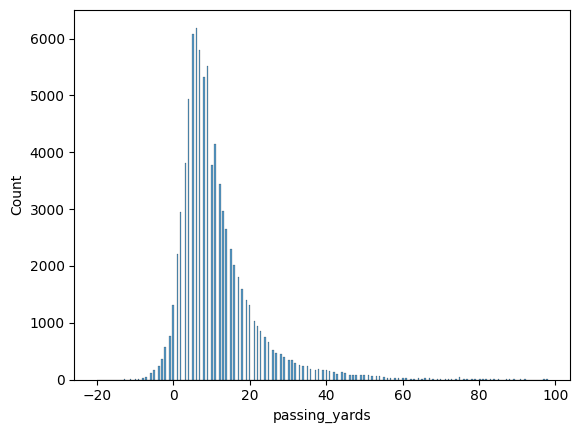

In [23]:
sns.histplot(data=pbp_py,x='passing_yards')
plt.show()

In [24]:
sns.set_theme(style='whitegrid',palette='colorblind')

/home/neil/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


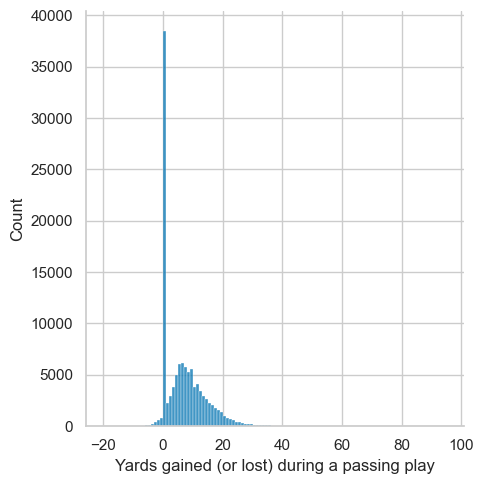

In [25]:
pbp_py_p_short = pbp_py_p.query('pass_length_air_yards == "short"')
#plot
pbp_py_hist_short = sns.displot(data=pbp_py_p_short, binwidth=1,x='passing_yards')
pbp_py_hist_short.set_axis_labels("Yards gained (or lost) during a passing play","Count")
plt.show()


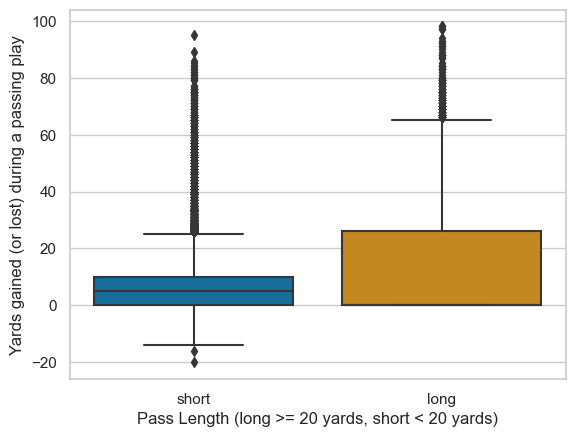

In [27]:
pass_boxplot = sns.boxplot(data=pbp_py_p,x='pass_length_air_yards',y='passing_yards')
pass_boxplot.set(xlabel='Pass Length (long >= 20 yards, short < 20 yards)', ylabel = 'Yards gained (or lost) during a passing play',)
plt.show()                           

In [28]:
pbp_py_p_s = pbp_py_p.groupby(['passer_id','passer','season']).agg({'passing_yards':['mean','count']})

In [29]:
pbp_py_p_s.columns = list(map('_'.join,pbp_py_p_s.columns.values))

In [31]:
pbp_py_p_s.rename(columns={'passing_yards_mean':'ypa','passing_yards_count':'n'}, inplace=True)

In [32]:
pbp_py_p_s_.sort_values(by=['ypa'],ascending=False).head()

,,,ypa,n
passer_id,passer,season,,
00-0035544,T.Kennedy,2021,75.0,1
00-0033132,K.Byard,2018,66.0,1
00-0031235,O.Beckham,2018,53.0,2
00-0030669,A.Wilson,2018,52.0,1
00-0029632,M.Sanu,2017,51.0,1


In [33]:
pbp_py_p_s_100 = pbp_py_p_s.query('n >= 100').sort_values(by=['ypa'],ascending=False)
pbp_py_p_s_100.head()

,,,ypa,n
passer_id,passer,season,,
00-0023682,R.Fitzpatrick,2018,9.617886,246
00-0026143,M.Ryan,2016,9.442155,631
00-0029701,R.Tannehill,2019,9.069971,343
00-0033537,D.Watson,2020,8.898524,542
00-0036212,T.Tagovailoa,2022,8.892231,399


In [43]:
#Calculate the YPA for each passer for each season
#Calculate teh YPA for each passer for the previous season
#Look at the correlation from the values calculated in steps 1 and 2 to see stability

pbp_py_p_s_pl = pbp_py_p.groupby(['passer_id','passer','season','pass_length_air_yards']).agg({"passing_yards":["mean","count"]})
pbp_py_p_s_pl.columns = list(map('_'.join,pbp_py_p_s_pl.columns.values))
pbp_py_p_s_pl.rename(columns={'passing_yards_mean':'ypa','passing_yards_count':'n'},inplace=True)
pbp_py_p_s_pl.reset_index(inplace=True)
q_value = ('(n >= 100 & ' +'pass_length_air_yards == "short") | ' +'(n >= 30 & ' +'pass_length_air_yards == "long")')
pbp_py_p_s_pl = pbp_py_p_s_pl.query(q_value).reset_index()

In [45]:
cols_save = ['passer_id', 'passer','season','pass_length_air_yards','ypa']

In [46]:
air_yards_py = pbp_py_p_s_pl[cols_save].copy()
air_yards_lag_py = air_yards_py.copy()
air_yards_lag_py['season'] += 1 
air_yards_lag_py.rename(columns={'ypa':'ypa_last'},inplace=True)

In [48]:
pbp_py_p_s_pl = air_yards_py.merge(air_yards_lag_py, how='inner',on=['passer_id','passer','season','pass_length_air_yards'])

In [52]:
pbp_py_p_s_pl[["pass_length_air_yards","passer","season","ypa","ypa_last"]].query('passer =="T.Brady" | passer == "A.Rodgers"').sort_values(["passer","pass_length_air_yards","season"]).to_string()

'   pass_length_air_yards     passer  season        ypa   ypa_last\n47                  long  A.Rodgers    2019  12.092593  12.011628\n49                  long  A.Rodgers    2020  16.097826  12.092593\n51                  long  A.Rodgers    2021  14.302632  16.097826\n53                  long  A.Rodgers    2022  10.312500  14.302632\n45                 short  A.Rodgers    2017   6.041475   6.693523\n46                 short  A.Rodgers    2018   6.697446   6.041475\n48                 short  A.Rodgers    2019   6.207224   6.697446\n50                 short  A.Rodgers    2020   6.718447   6.207224\n52                 short  A.Rodgers    2021   6.777083   6.718447\n54                 short  A.Rodgers    2022   6.239130   6.777083\n0                   long    T.Brady    2017  13.264706  15.768116\n2                   long    T.Brady    2018  10.232877  13.264706\n4                   long    T.Brady    2019  10.828571  10.232877\n6                   long    T.Brady    2020  12.252101  10.82

In [53]:
pbp_py_p_s_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passer_id              317 non-null    object 
 1   passer                 317 non-null    object 
 2   season                 317 non-null    int64  
 3   pass_length_air_yards  317 non-null    object 
 4   ypa                    317 non-null    float64
 5   ypa_last               317 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 15.0+ KB


In [ ]:
#1727